<h1>Necessary imports</h1>

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

<h1>Data</h1>

In [29]:
data = pd.read_csv('./input/news.csv')

<h3>Exploring the data</h3>

In [30]:
data.shape
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 123.8+ KB


<h3>Cleaning the data</h3>

In [32]:
data.columns = ['id', 'title', 'text', 'label']
data.drop(['id', 'title'], axis = 1)

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [33]:
#Remove URls
text = data['text'].replace(r'http\S+|www\S+|https\S+', '', regex=True)

#Remove user @ references and # from text
text = text.replace(r'\@\w+|\#', '', regex=True)

text.head(10)

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King () November 9, 2016 The lesson f...
4    It's primary day in New York and front-runners...
5      \nI’m not an immigrant, but my grandparents ...
6    Share This Baylee Luciani (left), Screenshot o...
7    A Czech stockbroker who saved more than 650 Je...
8    Hillary Clinton and Donald Trump made some ina...
9    Iranian negotiators reportedly have made a las...
Name: text, dtype: object

In [34]:
#Removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

text = text.apply(remove_punctuations)
text.head(10)

0    Daniel Greenfield a Shillman Journalism Fellow...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    US Secretary of State John F Kerry said Monday...
3    — Kaydee King  November 9 2016 The lesson from...
4    Its primary day in New York and frontrunners H...
5      \nI’m not an immigrant but my grandparents a...
6    Share This Baylee Luciani left Screenshot of w...
7    A Czech stockbroker who saved more than 650 Je...
8    Hillary Clinton and Donald Trump made some ina...
9    Iranian negotiators reportedly have made a las...
Name: text, dtype: object

In [35]:
#Tokenize words
tokens = text.apply(word_tokenize)

In [36]:
tokens.head(10)

0    [Daniel, Greenfield, a, Shillman, Journalism, ...
1    [Google, Pinterest, Digg, Linkedin, Reddit, St...
2    [US, Secretary, of, State, John, F, Kerry, sai...
3    [—, Kaydee, King, November, 9, 2016, The, less...
4    [Its, primary, day, in, New, York, and, frontr...
5    [I, ’, m, not, an, immigrant, but, my, grandpa...
6    [Share, This, Baylee, Luciani, left, Screensho...
7    [A, Czech, stockbroker, who, saved, more, than...
8    [Hillary, Clinton, and, Donald, Trump, made, s...
9    [Iranian, negotiators, reportedly, have, made,...
Name: text, dtype: object

In [37]:
labels = data['label']
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

<h1>Split the dataset into training and testing sets</h1>

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data['text'], labels, test_size = 0.2, random_state = 7)

<h1>TFIDF Vectorizer</h1>

In [39]:
#Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

#Fit and transform training set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

<h1>Passive Aggressive Classifier</h1>

In [40]:
#PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

#Predict on test set
y_pred = pac.predict(tfidf_test)

#Accuracy
acc_pac = accuracy_score(y_test, y_pred)
print(f'Accuracy : {round(acc_pac*100,2)}%')

Accuracy : 92.82%


In [41]:
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[588,  50],
       [ 41, 588]], dtype=int64)

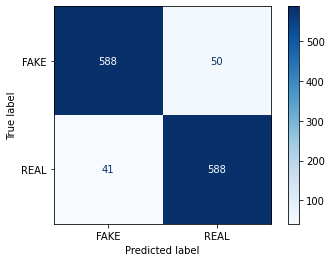

In [42]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(pac, tfidf_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [52]:
print("\nCLassification Report of Passive Aggressive Classifier:\n")
print(classification_report(y_test, y_pred))


CLassification Report of Passive Aggressive Classifier:

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



<h1>Logistic Regression</h1>

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs')
model.fit(tfidf_train, y_train)
y_predict = model.predict(tfidf_test)

acc_lr = accuracy_score(y_test, y_predict)
print(f'Accuracy : {round(acc_lr*100,2)}%')

Accuracy : 91.71%


In [44]:
confusion_matrix(y_test, y_predict, labels = ['FAKE', 'REAL'])

array([[600,  38],
       [ 67, 562]], dtype=int64)

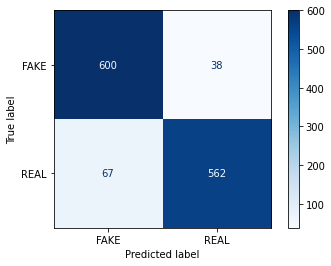

In [45]:
plot_confusion_matrix(model, tfidf_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [53]:
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, y_predict))


CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       638
        REAL       0.94      0.89      0.91       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



<h1>Naive Bayes Classifier</h1>

In [47]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(tfidf_train, y_train)
y_pred_nb = model_nb.predict(tfidf_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy : {round(acc_nb*100,2)}%')

Accuracy : 84.06%


In [48]:
confusion_matrix(y_test, y_pred_nb, labels = ['FAKE', 'REAL'])

array([[450, 188],
       [ 14, 615]], dtype=int64)

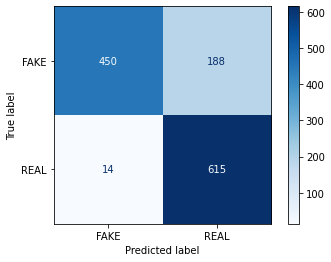

In [49]:
plot_confusion_matrix(model_nb, tfidf_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [54]:
print("\nCLassification Report of Nive Bayes Classifier:\n")
print(classification_report(y_test, y_pred_nb))


CLassification Report of Nive Bayes Classifier:

              precision    recall  f1-score   support

        FAKE       0.97      0.71      0.82       638
        REAL       0.77      0.98      0.86       629

    accuracy                           0.84      1267
   macro avg       0.87      0.84      0.84      1267
weighted avg       0.87      0.84      0.84      1267



<h1>Support Vector Classifier</h1>

In [55]:
from sklearn.svm import LinearSVC

model_svc = LinearSVC()
model_svc.fit(tfidf_train, y_train)
y_pred_svc = model_svc.predict(tfidf_test)

acc_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy : {round(acc_svc*100,2)}%')

Accuracy : 93.21%


In [56]:
confusion_matrix(y_test, y_pred_svc, labels = ['FAKE', 'REAL'])

array([[603,  35],
       [ 51, 578]], dtype=int64)

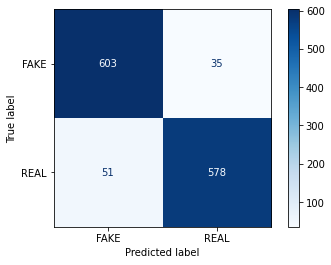

In [57]:
plot_confusion_matrix(model_svc, tfidf_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [58]:
print("\nCLassification Report of Nive Bayes Classifier:\n")
print(classification_report(y_test, y_pred_svc))


CLassification Report of Nive Bayes Classifier:

              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93       638
        REAL       0.94      0.92      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

